In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
target=train["SalePrice"]

In [3]:
del train["Id"]
del test["Id"]

In [4]:
train.select_dtypes([np.number]).isna().sum(0)

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [5]:
train.LotFrontage.fillna(train.LotFrontage.mean(),inplace=True)
train.GarageYrBlt.fillna(0,inplace=True)
train.MasVnrArea.fillna(0,inplace=True)


In [6]:
test.select_dtypes(exclude=[np.number]).isna().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [7]:
test.LotFrontage.fillna(test.LotFrontage.mean(),inplace=True) 
for i in test.select_dtypes([np.number]).isna().sum()[test.select_dtypes([np.number]).isna().sum()>0].keys():
       test[i].fillna(0,inplace=True)


In [8]:
df=pd.concat([train,test],ignore_index=True).drop("SalePrice",axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

<AxesSubplot:>

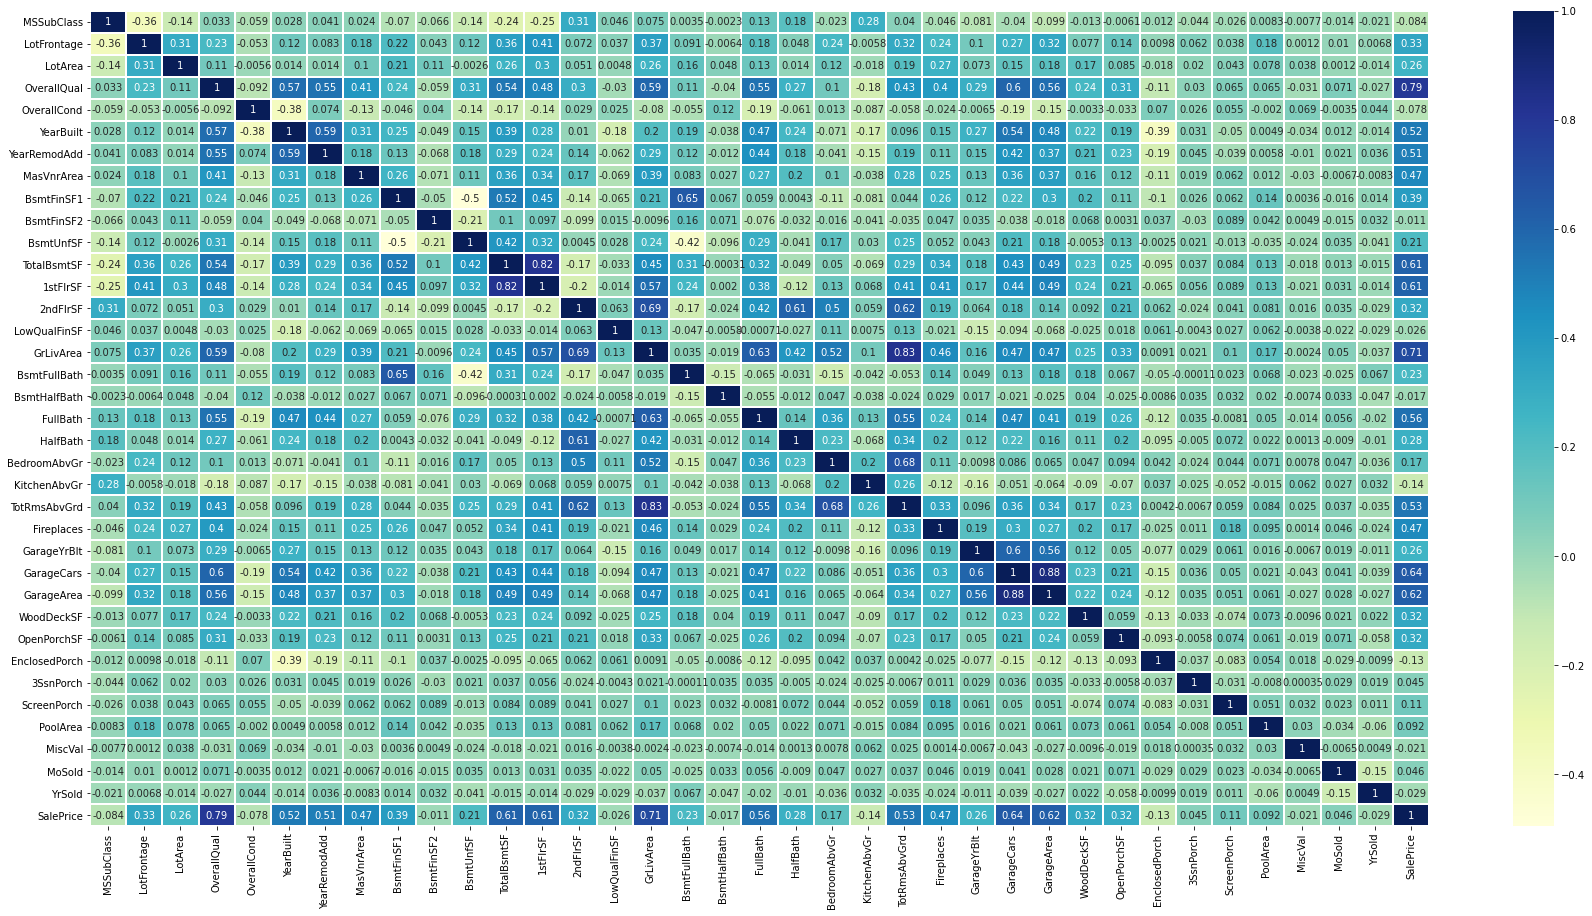

In [9]:
plt.figure(figsize=(30,15))
sns.heatmap(train.corr(),annot=True,linewidth=2,cmap="YlGnBu")

In [10]:
df.MSZoning.fillna(df.MSZoning.mode()[0],inplace=True)
df.Utilities.fillna(df.Utilities.mode()[0],inplace=True)
df.Exterior1st.fillna(df.Exterior1st.mode()[0],inplace=True)
df.Exterior2nd.fillna(df.Exterior2nd.mode()[0],inplace=True)
df.KitchenQual.fillna(df.KitchenQual.mode()[0],inplace=True)
df.Functional.fillna(df.Functional.mode()[0],inplace=True)
df.SaleType.fillna(df.SaleType.mode()[0],inplace=True)
df.Electrical.fillna(df.Electrical.mode()[0],inplace=True)
df.MasVnrType.fillna(df.MasVnrType.mode()[0],inplace=True)

In [11]:
nulls=df.select_dtypes(exclude=[np.number]).isna().sum()
nulls

MSZoning            0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         0
Functional          0
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            0
SaleCondition       0
dtype: int64

In [12]:
for i in nulls.keys():
    df[i].fillna("None",inplace=True)

In [13]:
df4=df.copy()
df4["MSZoning"].replace(["RM","FV","RH","C (all)","None"],"other",inplace=True)
df4=pd.get_dummies(df4)

In [14]:
#training data
training=df4.loc[:1459]

#testing data
testing=df4.loc[1460:]

In [15]:
training

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
a=pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
from xgboost import XGBRegressor
model = XGBRegressor(learning_rate=0.008,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)
model.fit(np.sqrt(training),target)
predictions=pd.Series( model.predict( np.sqrt(testing ) ) )
a.SalePrice=predictions
a.to_csv("submission.csv",index=False)